# Merging multiple data files from the same survey (ESBJERG)

Data from Esbjerg was recorded in 8 individual surveys, using 4 different calibations (leading to 4 different system GEX files)

”TX07_20230906_2x4_RC20-33.gex”: 20230921, 20230922, 20230925, 20230926
“TX07_20231016_2x4_RC20-33.gex”: 20231026, 20231027
“TX07_20231127_2x4x1_RC20_33.gex”: 20240109
“TX07_20240125_2x4_RC20-33.gex”: 20240313

For the first 3 surveys the same number of gates were used, but it differedin the lasy (TX07_20240125_2x4_RC20-33.gex)

Below is an example of how to

**A**: invert each survey individually, and then combine the results
* a1) combine survey files (data) for each calibration file
* b1) invert each survey individually
* c1) merge all posterior results in to one posterior file

**B**: Combine all data (for the first three surveys) and one system file to invert all data



In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # #%load_ext autoreload
    # # #%autoreload 2
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


## GET The raw data, and merge surveys

In [3]:
# 8 DATA files are available, corresponding to 8 different surveys obtained with 4 different GEX files
case = 'ESBJERG'
files = ig.get_case_data(case=case, loadType='premerge')

Getting data for case: ESBJERG
--> Got data for case: ESBJERG


### Case A: Treat each area individually

In [4]:
# Define the surveys with the same systemfile (gex)

f_gex1 ='TX07_20230906_2x4_RC20-33.gex'
f_data1 = []
f_data1.append('20230921_AVG_export.h5')
f_data1.append('20230922_AVG_export.h5')
f_data1.append('20230925_AVG_export.h5')
f_data1.append('20230926_AVG_export.h5')

f_gex2 ='TX07_20231016_2x4_RC20-33.gex'
f_data2 = []
f_data2.append('20231026_AVG_export.h5')
f_data2.append('20231027_AVG_export.h5')

f_gex3 = 'TX07_20231127_2x4x1_RC20_33.gex'
f_data3 = []
f_data3.append('20240109_AVG_export.h5')

f_gex4 = 'TX07_20240125_2x4_RC20-33.gex'
f_data4 = []
f_data4.append('20240313_AVG_export.h5')

In [5]:
# Merge the data
f_data_merged1 = ig.merge_data(f_data1, f_gex1, f_data_merged_h5='ESBJERG_1.h5')
f_data_merged2 = ig.merge_data(f_data2, f_gex2, f_data_merged_h5='ESBJERG_2.h5')
f_data_merged3 = ig.merge_data(f_data3, f_gex3, f_data_merged_h5='ESBJERG_3.h5')
f_data_merged4 = ig.merge_data(f_data4, f_gex4, f_data_merged_h5='ESBJERG_4.h5')

Adding group ESBJERG_1.h5:D1 
Adding group ESBJERG_2.h5:D1 
Adding group ESBJERG_3.h5:D1 
Adding group ESBJERG_4.h5:D1 


f_data_h5=ESBJERG_4.h5


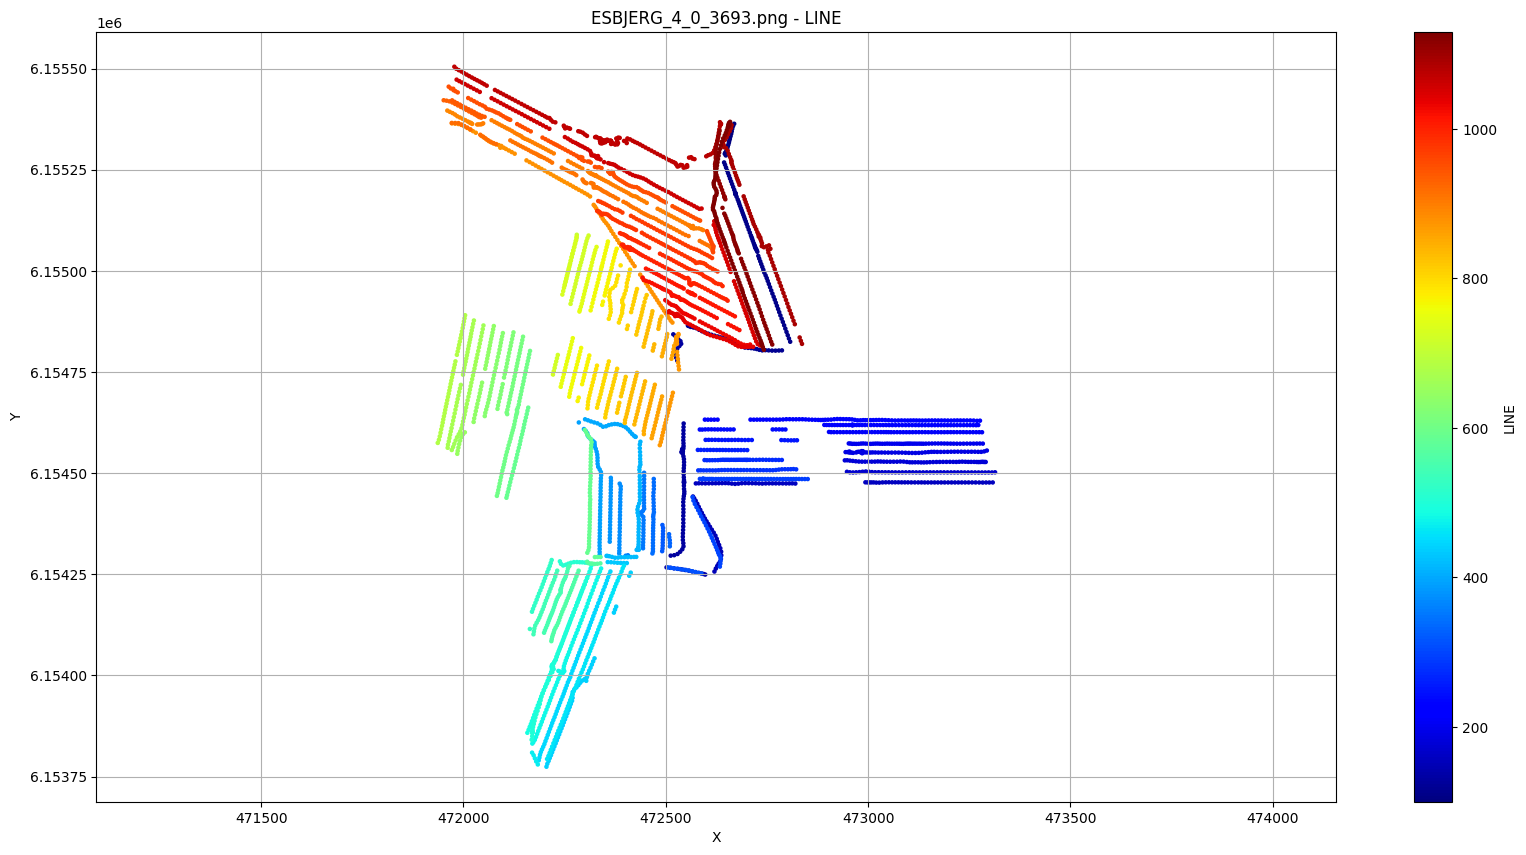

f_data_h5=ESBJERG_3.h5


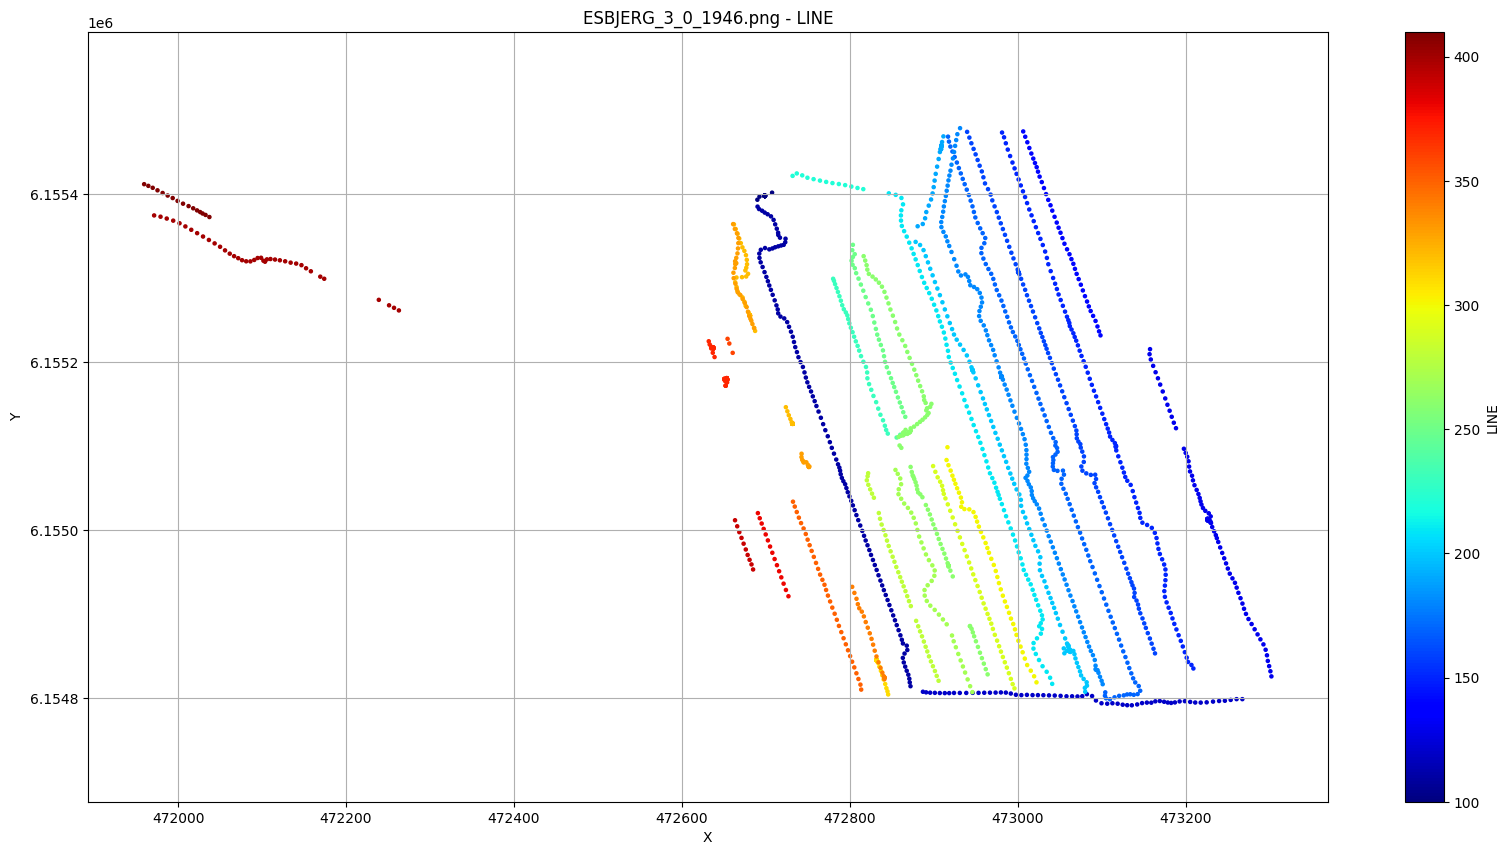

f_data_h5=ESBJERG_2.h5


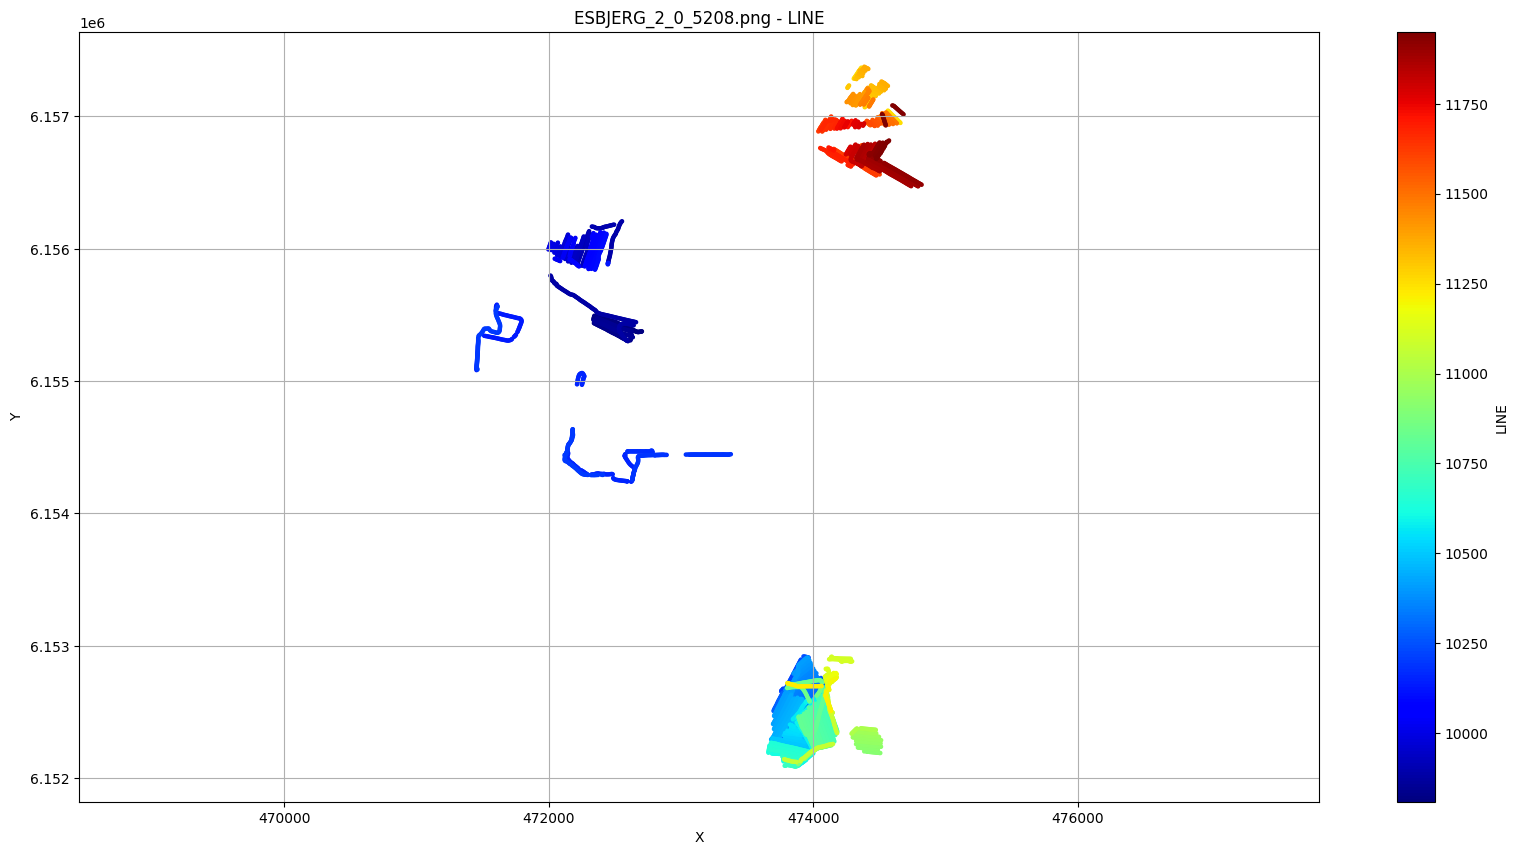

f_data_h5=ESBJERG_1.h5


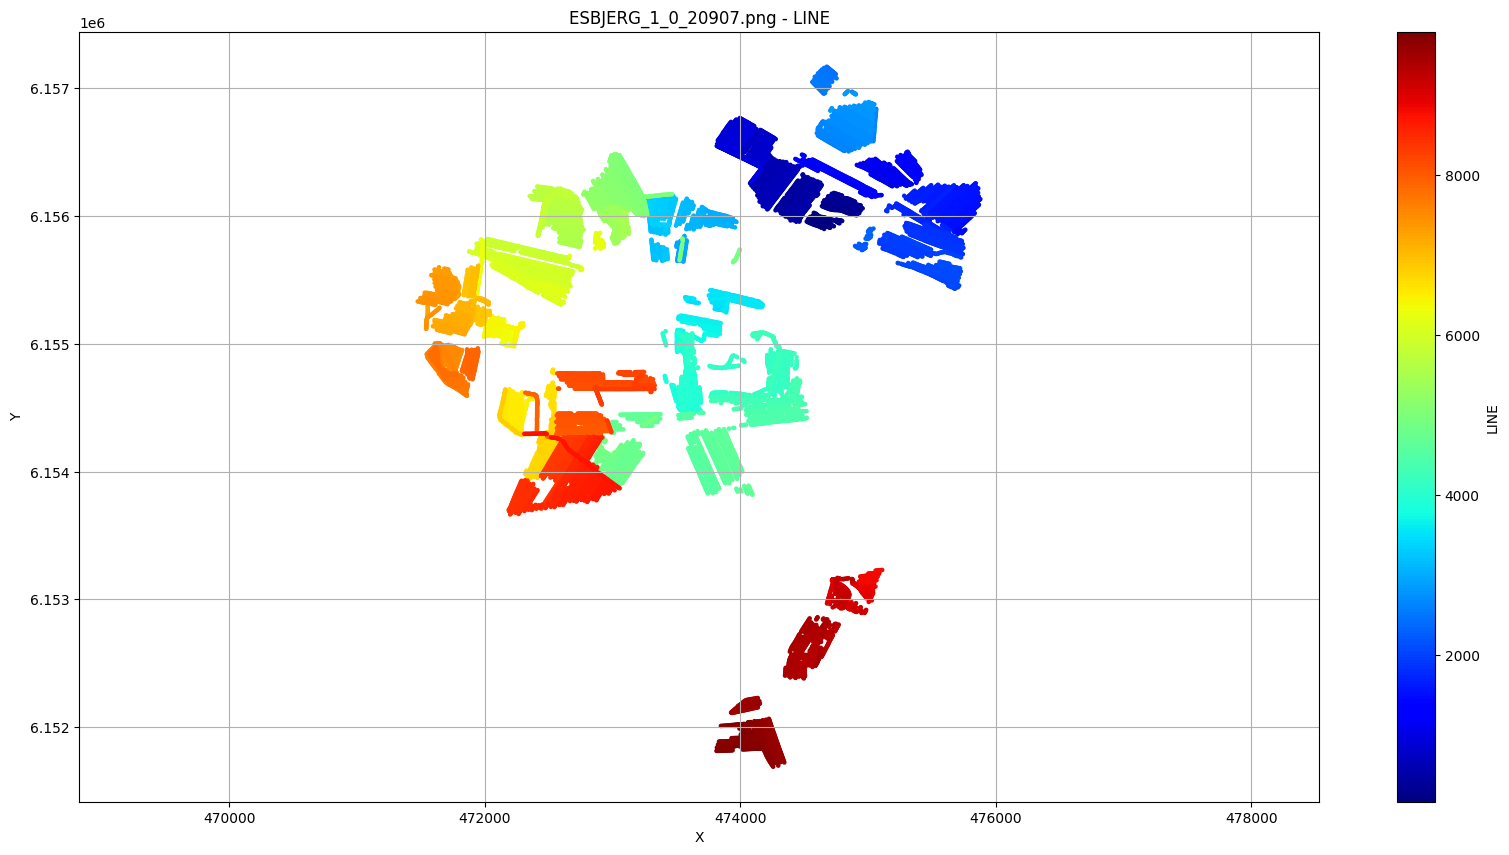

In [6]:
# Plot the geometry for each of the 4 areas
ig.plot_geometry(f_data_merged4, pl='LINE')
ig.plot_geometry(f_data_merged3, pl='LINE')
ig.plot_geometry(f_data_merged2, pl='LINE')
ig.plot_geometry(f_data_merged1, pl='LINE')

#### Run multiple inversions

Creating a copy of PRIOR_CHI2_NF_4_log-uniform_N100000.h5
                as PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5
prior_data_gaaem: Using 32 parallel threads.


prior_data_gaaem: Time=121.8s/100000 soundings.  1.2ms/sounding, 820.9it/s


integrate_rejection: Time=161.4s/20907 soundings,  7.7ms/sounding, 129.5it/s
integrate_rejection: T_av=53.5


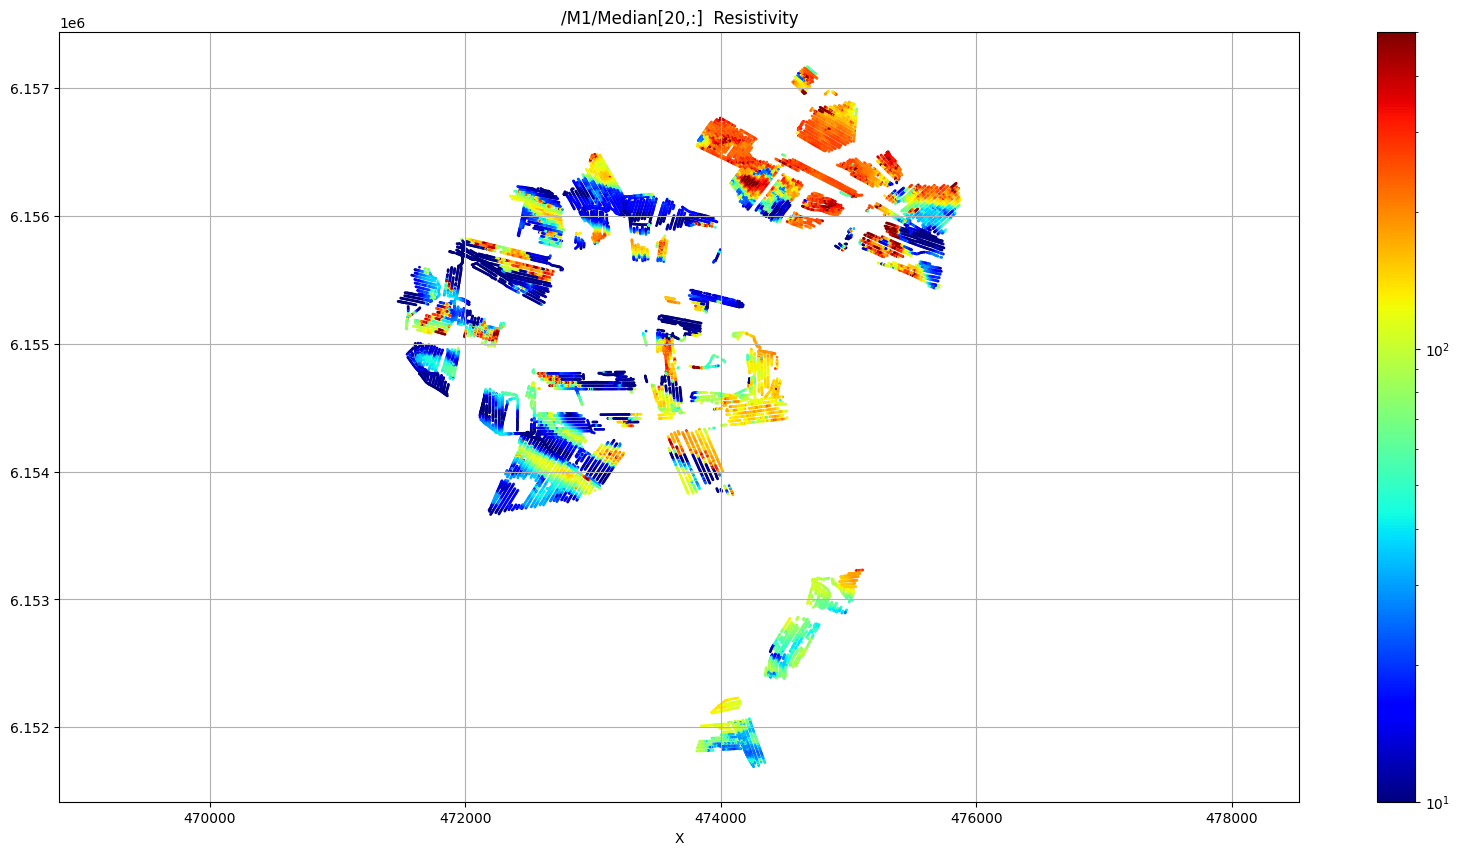

Creating a copy of PRIOR_CHI2_NF_4_log-uniform_N100000.h5
                as PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
prior_data_gaaem: Using 32 parallel threads.


prior_data_gaaem: Time=128.5s/100000 soundings.  1.3ms/sounding, 778.1it/s


integrate_rejection: Time= 40.3s/5208 soundings,  7.7ms/sounding, 129.1it/s
integrate_rejection: T_av=47.4


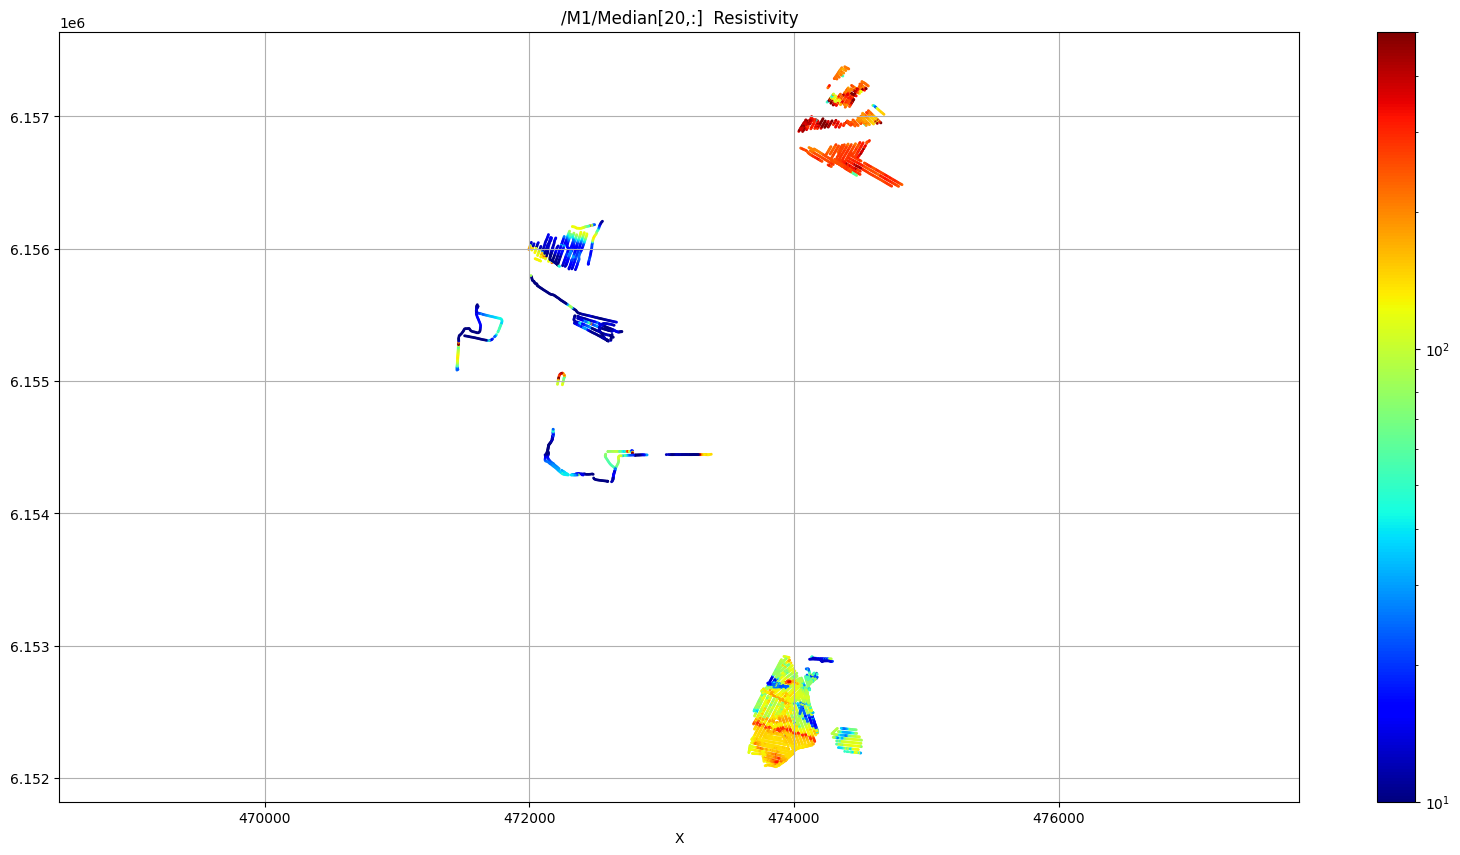

Creating a copy of PRIOR_CHI2_NF_4_log-uniform_N100000.h5
                as PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20231127_2x4x1_RC20_33_Nh280_Nf12.h5
prior_data_gaaem: Using 32 parallel threads.


prior_data_gaaem: Time=123.3s/100000 soundings.  1.2ms/sounding, 810.9it/s


integrate_rejection: Time= 14.4s/1946 soundings,  7.4ms/sounding, 134.7it/s
integrate_rejection: T_av=18.4


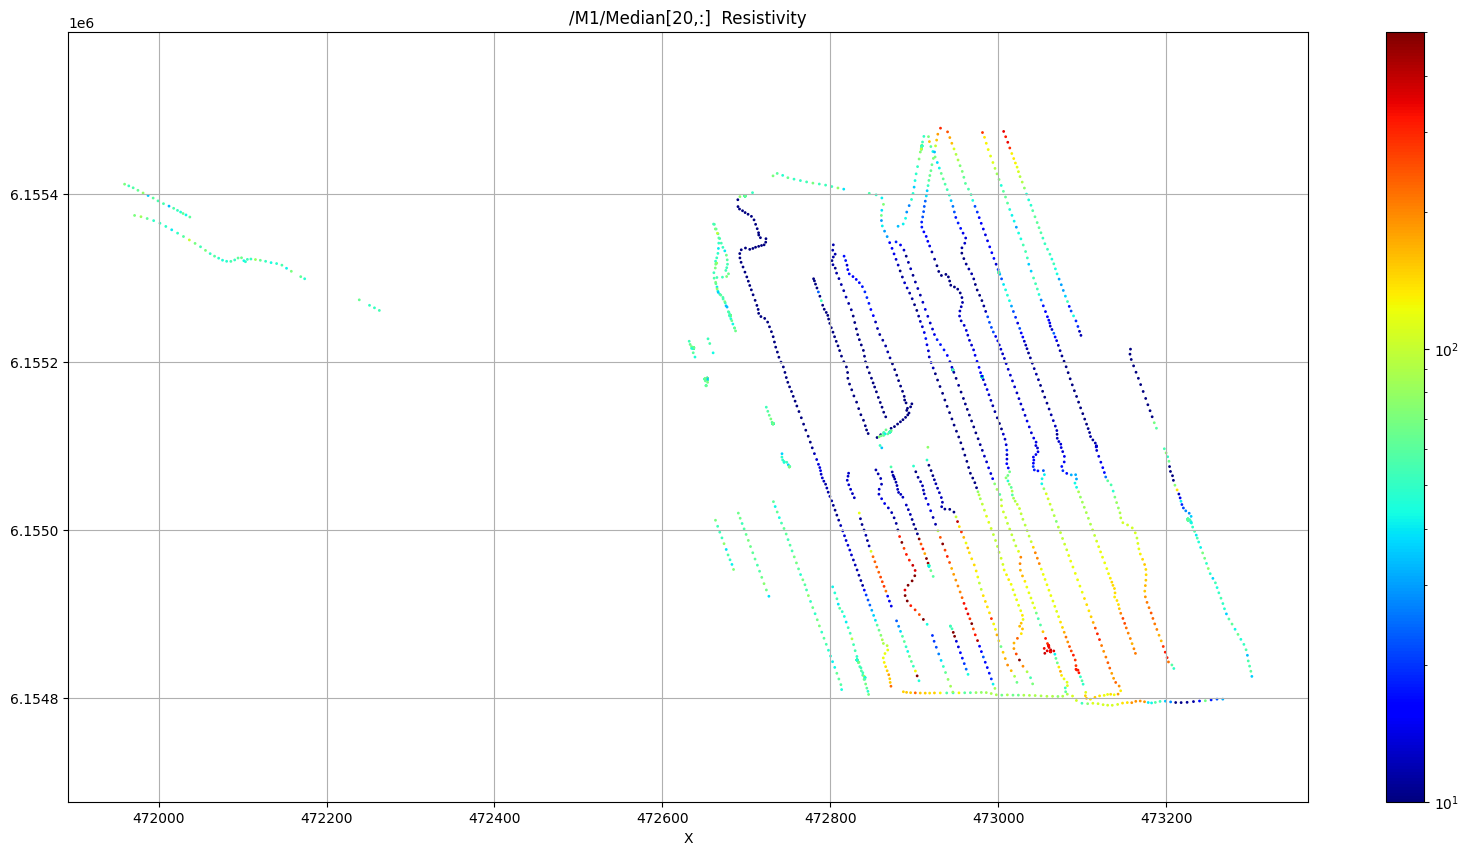

Creating a copy of PRIOR_CHI2_NF_4_log-uniform_N100000.h5
                as PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240125_2x4_RC20-33_Nh280_Nf12.h5
prior_data_gaaem: Using 32 parallel threads.


prior_data_gaaem: Time=123.8s/100000 soundings.  1.2ms/sounding, 807.5it/s


integrate_rejection: Time= 29.0s/3693 soundings,  7.9ms/sounding, 127.3it/s
integrate_rejection: T_av=50.2


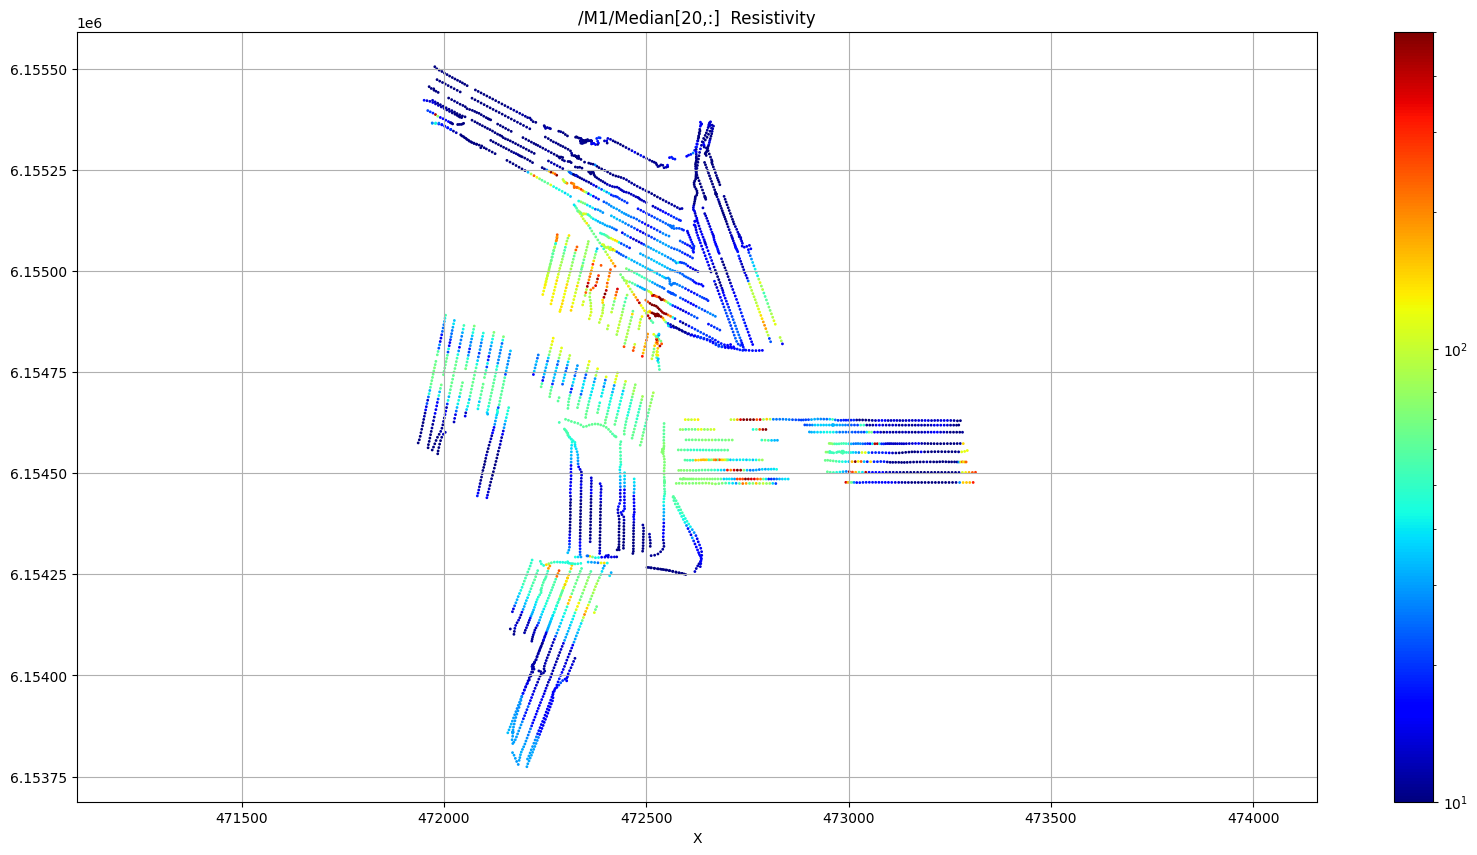

In [7]:

# Set PRIOR model: The prior is the same for all sets of data
N=100000
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=4, RHO_min=1, RHO_max=3000)

# Go through each of the 4 areas and invert the data seperately, using the same prior model, but different GEX files and hence prior data
f_data_all = [f_data_merged1, f_data_merged2, f_data_merged3, f_data_merged4]
f_prior_data_all=[]
f_post_all=[]
for f_data_h5 in f_data_all:


    file_gex = ig.get_gex_file_from_data(f_data_h5)
    f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)
    #f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, f_data_h5, parallel=parallel, showInfo=0)
    f_prior_data_all.append(f_prior_data_h5)

    f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                    f_data_h5, 
                                    showInfo=0, 
                                    parallel=parallel)
                                    #updatePostStat=False)
    f_post_all.append(f_post_h5)
    
    ig.plot_feature_2d(f_post_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1)
    plt.show()

#### Merge the posterior data into one posterior

Adding group DATA_merged_N2.h5:D1 


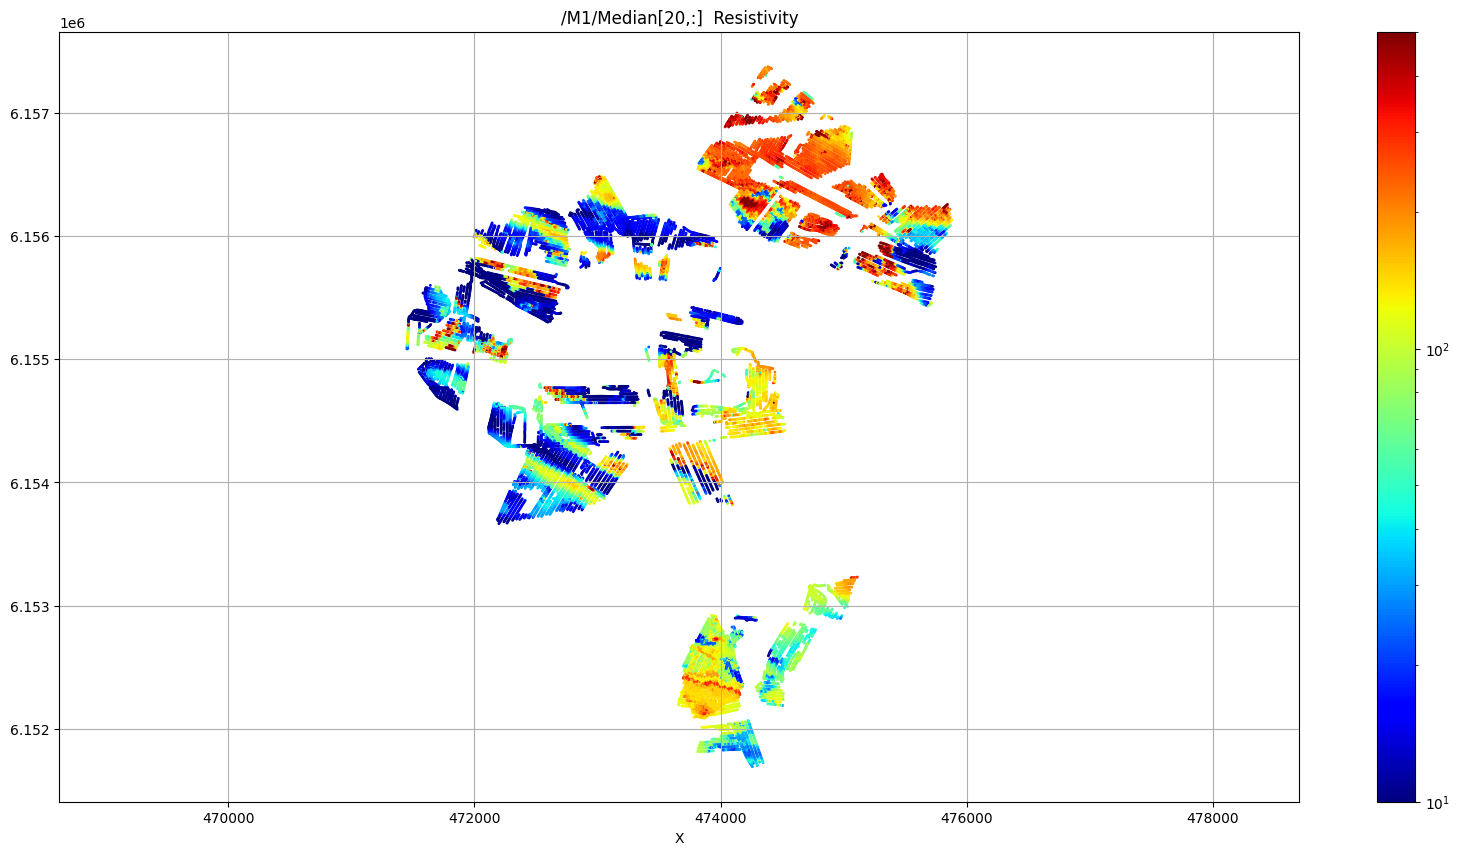

In [8]:
f_post_merged_h5, f_data_merged_h5  = ig.merge_posterior(f_post_all[0:-2], f_data_all[0:-2], f_post_merged_h5='POST_ESBJERG_MERGED.h5')
ig.integrate_posterior_stats(f_post_merged_h5)
ig.plot_feature_2d(f_post_merged_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1)
plt.show()

### Case B: Combine all data, and use a single system GEX file

In [9]:
# Combine f_data1, f_data2, and f_data3 into a single data set, and use a single system GEX file (this leads to an error)
## Cannot used the last dataset witjh rest as it has a different form!!!
# f_data = f_data1 + f_data2 + f_data3 + f_data4

f_data = f_data1 + f_data2 + f_data3
f_data_all_h5 = ig.merge_data(f_data1+f_data2+f_data3, f_gex1, f_data_merged_h5='ESBJERG_ALL.h5')
#ig.plot_geometry(f_data_merged_h5, pl='LINE')

Adding group ESBJERG_ALL.h5:D1 


In [10]:
file_gex = ig.get_gex_file_from_data(f_data_all_h5)
f_prior_data_all_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)

f_post_all_h5 = ig.integrate_rejection(f_prior_data_all_h5, 
                                f_data_all_h5, 
                                showInfo=0, 
                                parallel=parallel,
                                updatePostStat=True)

Creating a copy of PRIOR_CHI2_NF_4_log-uniform_N100000.h5
                as PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5
prior_data_gaaem: Using 32 parallel threads.


prior_data_gaaem: Time=123.0s/100000 soundings.  1.2ms/sounding, 813.1it/s


integrate_rejection: Time=214.6s/28061 soundings,  7.6ms/sounding, 130.7it/s
integrate_rejection: T_av=49.9


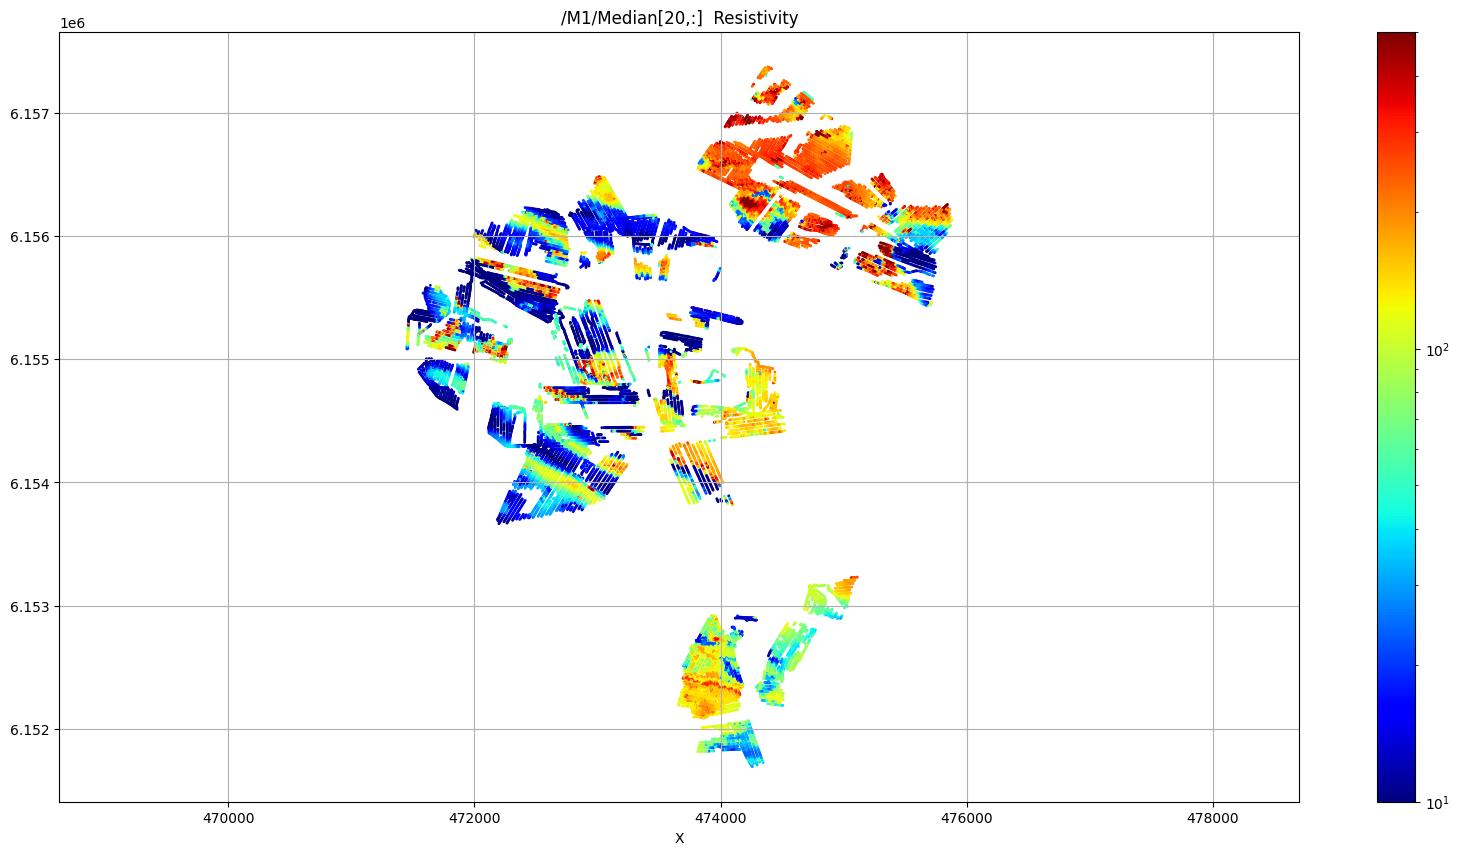

In [11]:
ig.plot_feature_2d(f_post_all_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1)
plt.show()

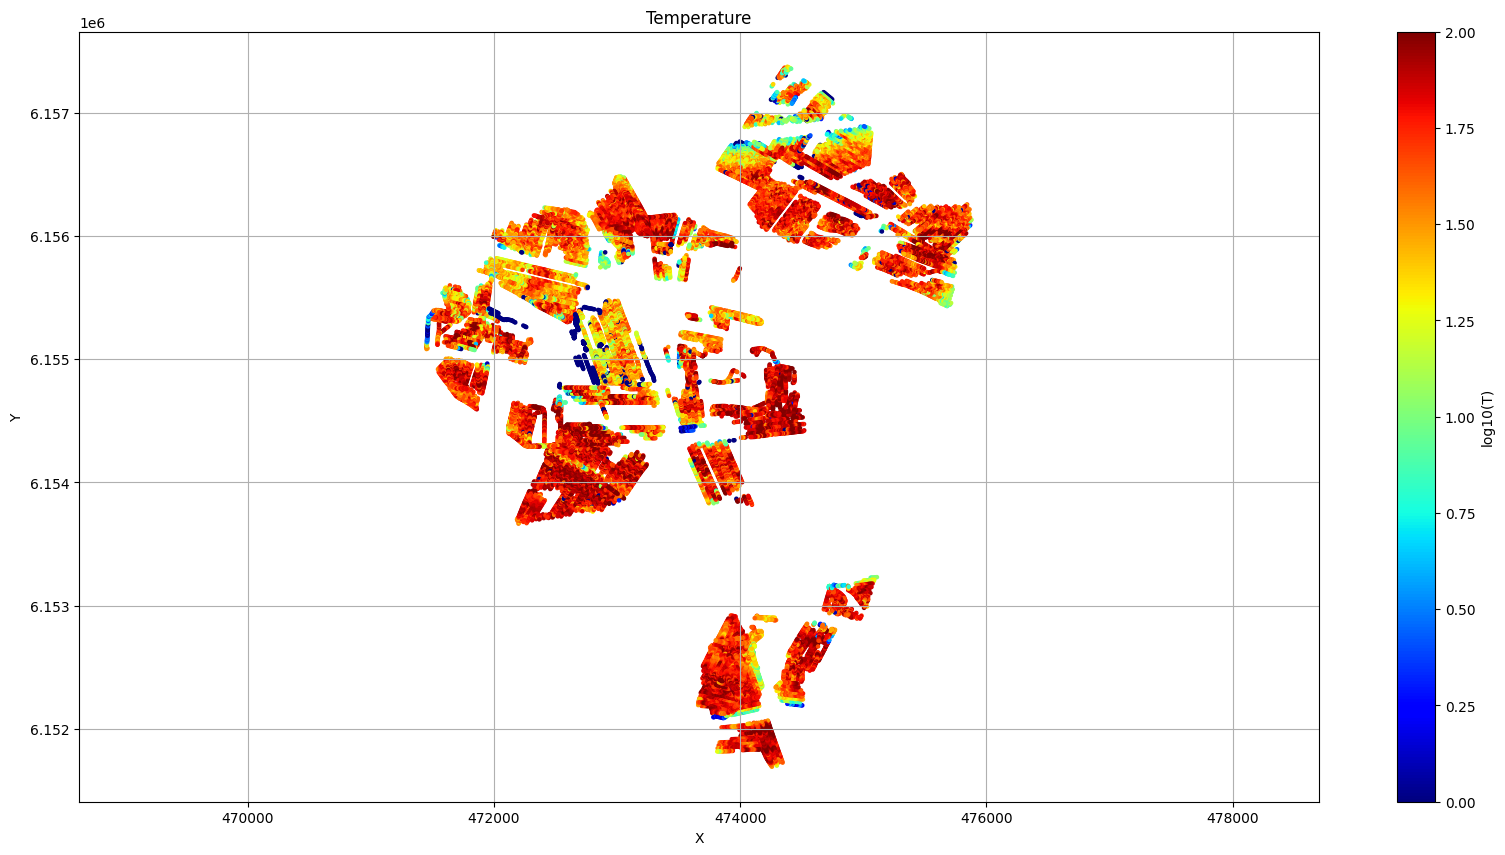

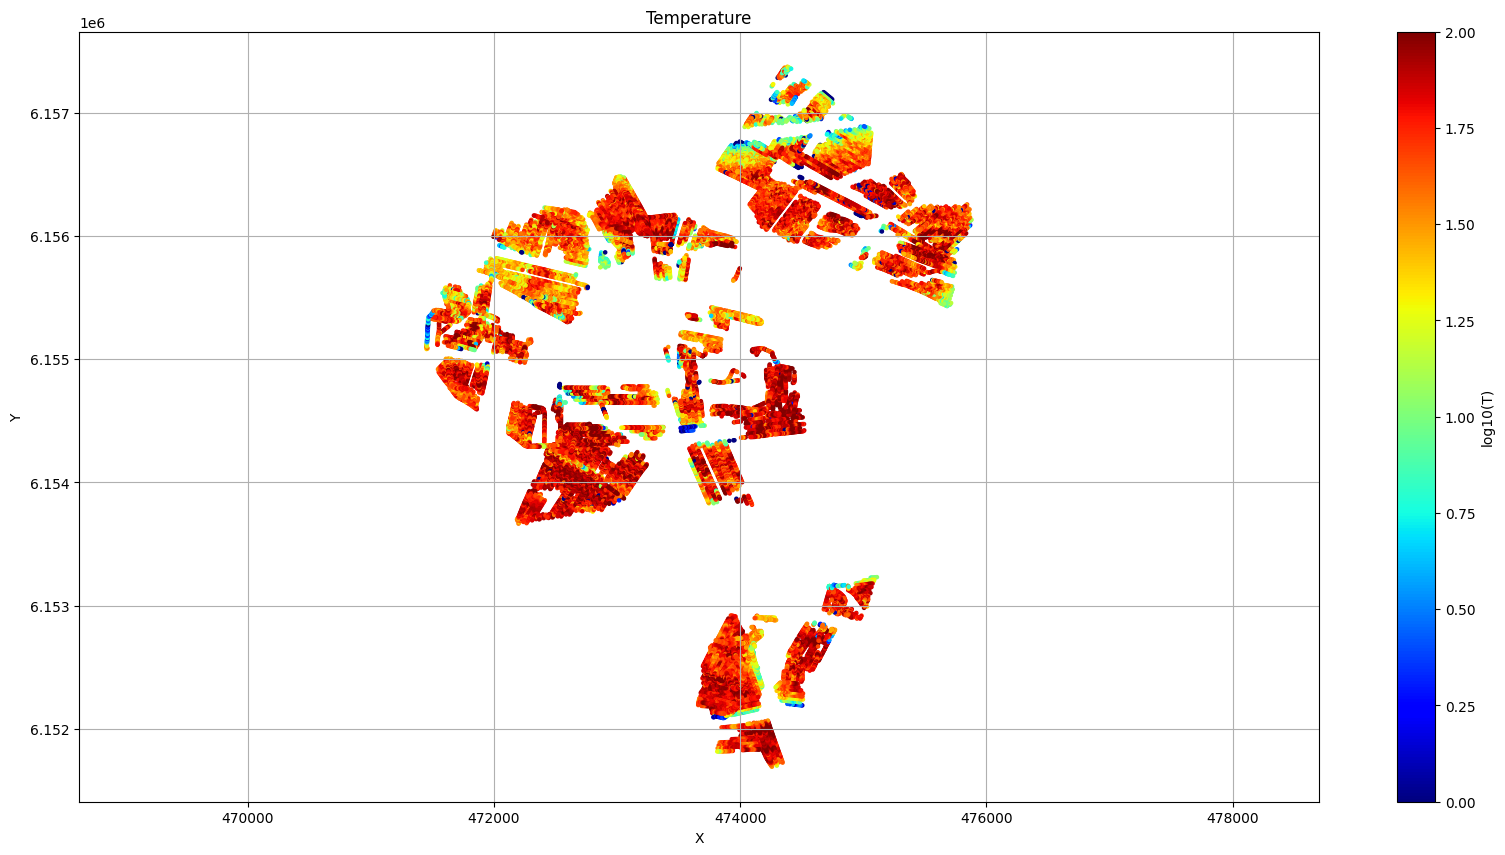

In [12]:
ig.plot_T_EV(f_post_all_h5, pl='T')
plt.show()
ig.plot_T_EV(f_post_merged_h5, pl='T')
plt.show()